 Problem 1- Data Read, Write and Inspect:
 Complete all following Task:
 • Dataset for the Task: "bank.csv"
 1. Load the provided dataset and import in pandas DataFrame.
 2. Check info of the DataFrame and identify following:
 (a) columns with dtypes=object
 (b) unique values of those columns.
 (c) check for the total number of null values in each column.
 3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
 ”.csv” with name ”banknumericdata.csv”
 4. Read ”banknumericdata.csv” and Find the summary statistics.


In [61]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Copy of bank .csv')
df = pd.DataFrame(dataset)
# df.info()

object_columns = df.select_dtypes(include=['object']).columns
print("Columns with dtype = object are \n ", object_columns)

unique_values = df[object_columns].nunique()
print("Unique values of object columns:")
print(unique_values)

df_without_dtypeobjects = df.select_dtypes(exclude=['object'])
df_without_dtypeobjects.to_csv('banknumericdata.csv', index=False)

df_without_dtypeobjects

# 4. Read "banknumericdata.csv" and find the summary statistics
df_numeric_read = pd.read_csv('banknumericdata.csv')
summary = df_numeric_read.describe()
print("\nSummary statistics:\n")
print(summary)

Columns with dtype = object are 
  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Unique values of object columns:
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

Summary statistics:

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [21]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Copy of medical_students_dataset.csv')
df = pd.DataFrame(dataset)
df
# check info of the DataFrame and identify column with missing (null) values.
# print(iris_df.isnull().sum())
df.info()
print("Missing values in data set :")
print(df.isnull().sum())

# make copy of DataFrame for filling missing values
filled_df = df.copy()

# Fill numerical columns with the mean
numerical_columns = ['Student ID', 'Age', 'Height', 'Weight', 'BMI', 'Temperature',
                     'Heart Rate', 'Blood Pressure', 'Cholesterol']
filled_df[numerical_columns] = filled_df[numerical_columns].fillna(filled_df[numerical_columns].mean())

# Fill categorical columns with the mode
categorical_columns = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
for column in categorical_columns:
    filled_df[column] = filled_df[column].fillna(filled_df[column].mode()[0])

# Verify if there are still missing values
remaining_missing_values = filled_df.isnull().sum()

# Display the head of the filled DataFrame and remaining missing values
print(filled_df.head())

print("Duplicate values :")
filled_df.duplicated().sum()
print(filled_df.duplicated())
print("Duplicate values sum:")
print(filled_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Missing values in data set :
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            200

Here mean is used for numeric data like student id age height weight BMi tempreatture heart rate cholestrol  because there is harldy any possiblity of outliers in these types of data since they are consistent characteristics of data.   

Also mode is used in data like gender blood type diabetes and cholestrol because they are categorized mostly on the basis of often occuring or common values.


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?


In [28]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Copy of Titanic-Dataset.csv')
df = pd.DataFrame(dataset)

# Subset the DataFrame for specific columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only rows where 'Pclass' == 1
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate statistics for the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
print("Mean fare :",mean_fare)
median_fare = first_class_df['Fare'].median()
print("Median fare",median_fare)
max_fare = first_class_df['Fare'].max()
print("Max fare", max_fare)
min_fare = first_class_df['Fare'].min()
print("Min fare",min_fare)

Mean fare : 84.1546875
Median fare 60.287499999999994
Max fare 512.3292
Min fare 0.0


2. How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [29]:
# Count null values in the 'Age' column
null_age_count = first_class_df['Age'].isnull().sum()
print(f"Number of null values in 'Age': {null_age_count}")

# Drop rows with null values in the 'Age' column
first_class_df_dropped = first_class_df.dropna(subset=['Age'])

# Verify that the null values are dropped
print(f"Number of null values in 'Age' after dropping: {first_class_df_dropped['Age'].isnull().sum()}")


Number of null values in 'Age': 30
Number of null values in 'Age' after dropping: 0


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

In [30]:
# Check for unique values and count of missing values in the 'Embarked' column
embarked_values = df['Embarked'].value_counts(dropna=False)
print("Embarked column value counts including missing values:")
print(embarked_values)

# Mapping the categorical data to their corresponding ports of embarkation
embarked_mapping = {
    'C': 'Cherbourg',
    'Q': 'Queenstown',
    'S': 'Southampton'
}

# Replace the values in the 'Embarked' column with the mapped values
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# Verify the changes
print("\nMapped 'Embarked' column values:")
print(df['Embarked'].value_counts(dropna=False))


Embarked column value counts including missing values:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

Mapped 'Embarked' column values:
Embarked
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64


Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [31]:
# Perform one-hot encoding on the 'Embarked' column
df_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new columns to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Embarked' column
df = df.drop('Embarked', axis=1)

# Print the first few rows of the modified DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_Cherbourg  \
0      0         A/5 21171   7.2500   NaN               False   
1      0          PC 17599  71.2833   C85                True   
2      0  STON/O2. 3101282   7.9250   NaN               False   
3      0            113803  53.1000  C123               Fals

Mean survival rate by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


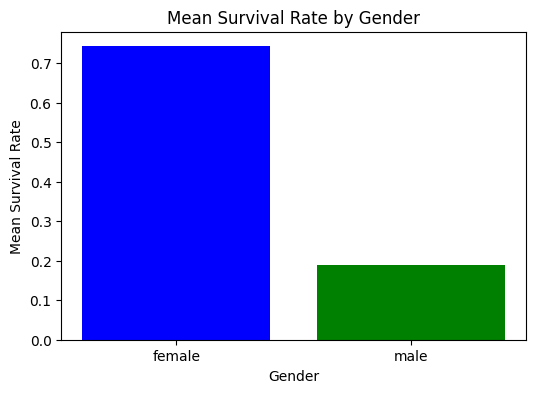

In [52]:
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(f"Mean survival rate by gender:\n{mean_survival_by_gender}")

# Bar plot to show the mean survival rate by gender
plt.figure(figsize=(6, 4))
plt.bar(mean_survival_by_gender.index, mean_survival_by_gender.values, color=['blue', 'green'])
plt.title('Mean Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Cherbourg',
       'Embarked_Queenstown', 'Embarked_Southampton'],
      dtype='object')
Mean survival rate by gender and embarkation port:
Embarked  Cherbourg  Queenstown  Southampton
Sex                                         
female     0.880000    0.750000     0.689655
male       0.305263    0.073171     0.174603


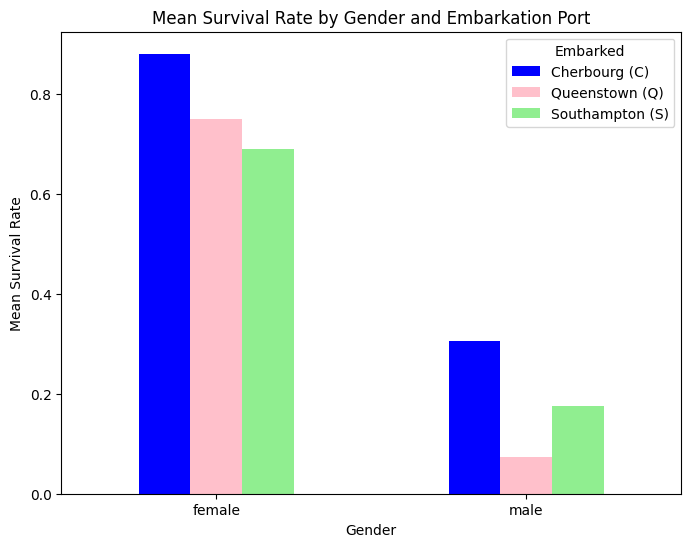

In [59]:
print(df.columns)

# Create a new column 'Embarked' based on the binary columns
df['Embarked'] = df[['Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton']].idxmax(axis=1).str.replace('Embarked_', '')

# Now, calculate the mean survival rate by gender and embarkation port
mean_survival_by_gender_and_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()
print(f"Mean survival rate by gender and embarkation port:\n{mean_survival_by_gender_and_embarked}")

# Bar plot to show the mean survival rate by gender and embarkation port
mean_survival_by_gender_and_embarked.plot(kind='bar', figsize=(8, 6), color=['blue', 'pink', 'lightgreen'])
plt.title('Mean Survival Rate by Gender and Embarkation Port')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them readable
plt.legend(title='Embarked', labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.show()


Mean survival rate by Pclass and Age Group:
AgeGroup        Q1        Q2        Q3        Q4        Q5
Pclass                                                    
1         0.809524  0.761905  0.666667  0.777778  0.506667
2         0.742857  0.400000  0.416667  0.461538  0.363636
3         0.333333  0.197674  0.283582  0.166667  0.088235


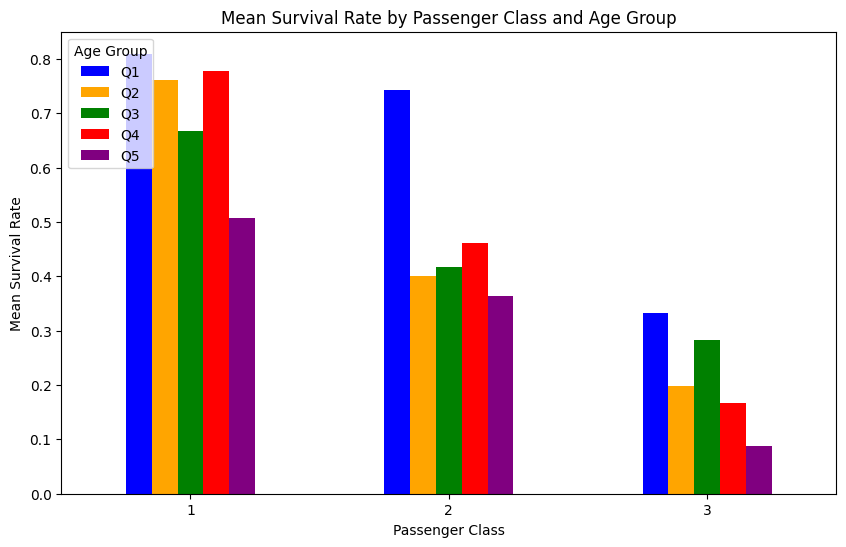

In [60]:
age_quantiles = pd.qcut(df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df['AgeGroup'] = age_quantiles

mean_survival_by_class_and_age = df.groupby(['Pclass', 'AgeGroup'], observed=False)['Survived'].mean().unstack()

print(f"Mean survival rate by Pclass and Age Group:\n{mean_survival_by_class_and_age}")

# Plot the mean survival rate by Pclass and Age Group
mean_survival_by_class_and_age.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Mean Survival Rate by Passenger Class and Age Group')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Age Group', loc='upper left', labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
plt.show()